<a href="https://colab.research.google.com/github/Shubhankitsirvaiya/Cardiovascular_classification/blob/main/Capstone_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Description
Demographic:
• Sex: male or female("M" or "F")
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
• Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
• Glucose: glucose level (Continuous)
Predict variable (desired target)
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV





In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df=pd.read_csv("/content/drive/MyDrive/Copy of data_cardiovascular_risk.csv")

In [6]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [7]:
#df.groupby('age')['TenYearCHD'].count()

In [8]:
df[df['prevalentStroke']==1]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
29,29,63,1.0,F,NO,0.0,0.0,1,1,0,273.0,152.0,70.0,19.69,80.0,79.0,1
38,38,41,2.0,F,YES,9.0,1.0,1,1,0,180.0,114.0,70.0,22.41,92.0,NaN,0
54,54,63,1.0,M,YES,20.0,0.0,1,1,0,213.0,163.0,94.0,NaN,76.0,69.0,1
86,86,52,2.0,M,NO,0.0,0.0,1,0,0,202.0,136.0,94.0,29.93,83.0,67.0,1
173,173,58,1.0,F,NO,0.0,0.0,1,1,1,267.0,157.0,94.0,33.32,92.0,205.0,1
584,584,52,2.0,F,YES,5.0,0.0,1,1,0,205.0,159.0,110.0,28.18,75.0,83.0,1
610,610,42,2.0,F,NO,0.0,0.0,1,0,0,206.0,101.0,75.0,18.73,55.0,84.0,0
680,680,60,3.0,M,NO,0.0,0.0,1,1,0,203.0,140.0,95.0,28.04,60.0,83.0,0
795,795,65,1.0,M,NO,0.0,0.0,1,1,0,266.0,140.0,100.0,29.36,80.0,77.0,1
958,958,54,2.0,F,NO,0.0,0.0,1,0,0,321.0,150.0,93.0,22.50,75.0,131.0,0


In [9]:
df.shape

(3390, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

# Null values

we can see some columns which have null values 

'education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose' columns has null values which we will have to deal with 

In [11]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


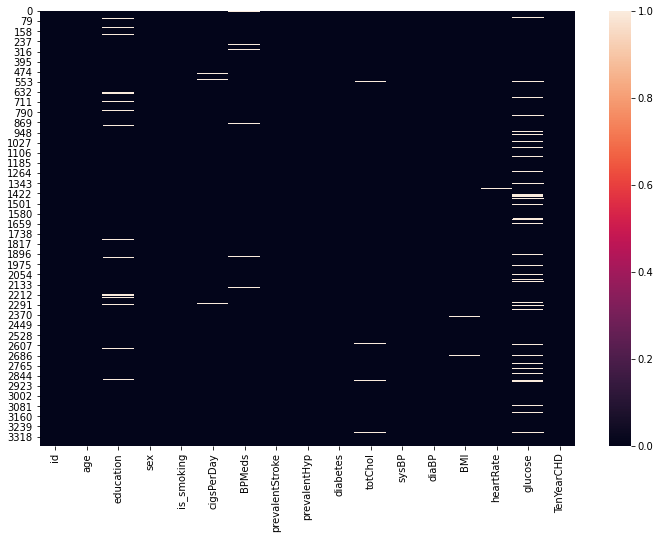

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

this heatmap gives the idea , of null values in the Data

We can use imputation of the missing values in detail , when we do feature engg later, where we will look into each features null value in detail

In [14]:
df.columns
cat_columns=['education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

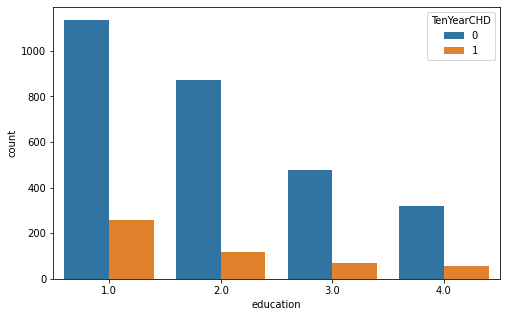

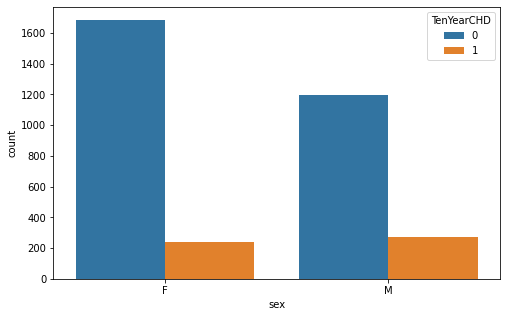

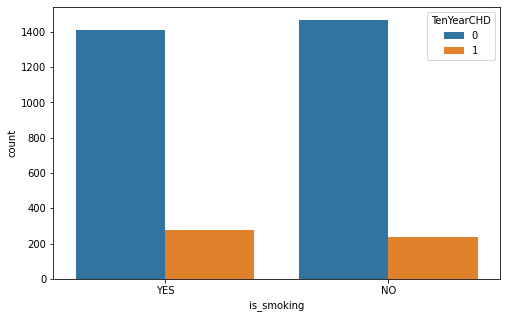

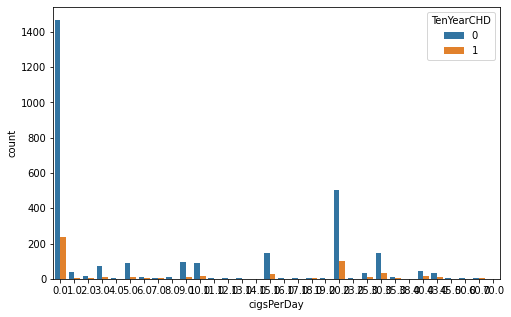

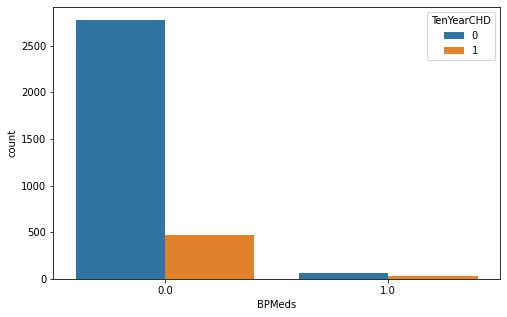

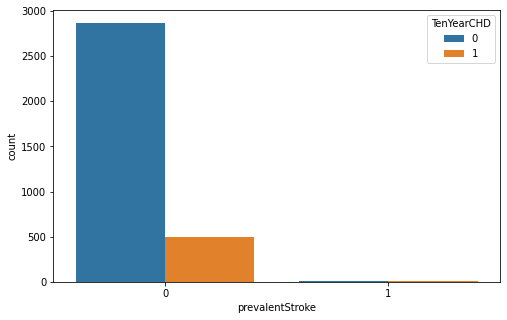

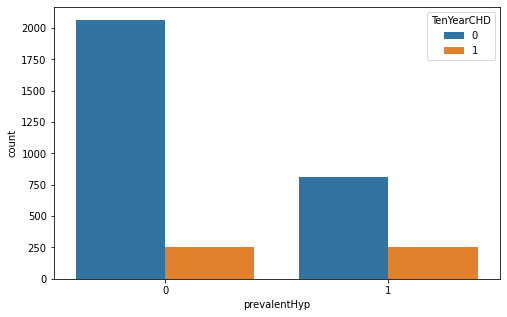

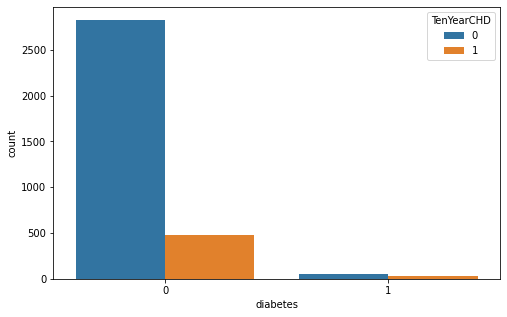

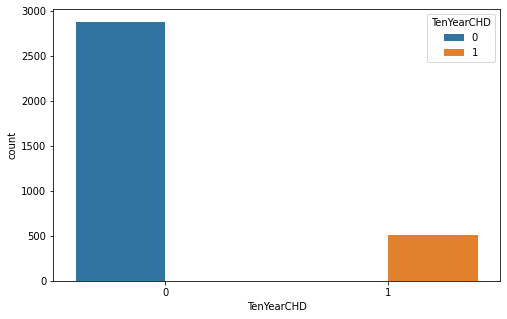

In [15]:
for i in cat_columns:
  plt.figure(figsize=(8,5))
  sns.countplot(df[i],hue=df['TenYearCHD'])

from here we can say that , 
distribution of both the category is random in each feature , so we can not take any descision of dropping the columns as of now

In [16]:
num_cat=['age', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

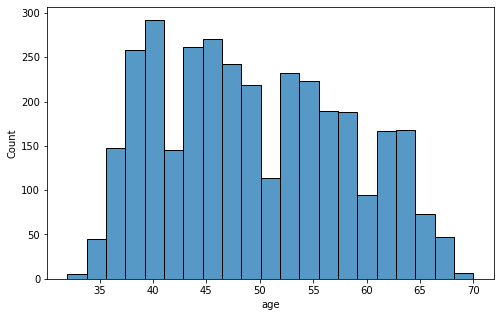

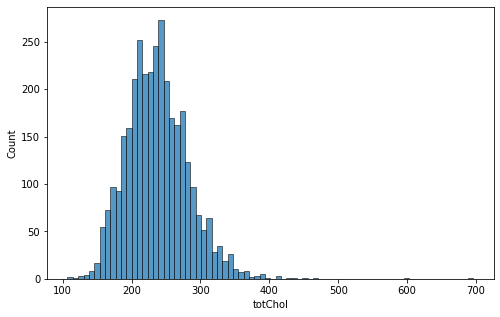

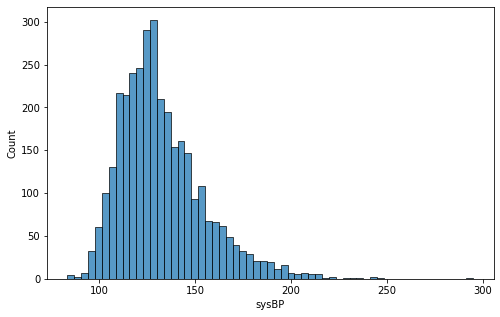

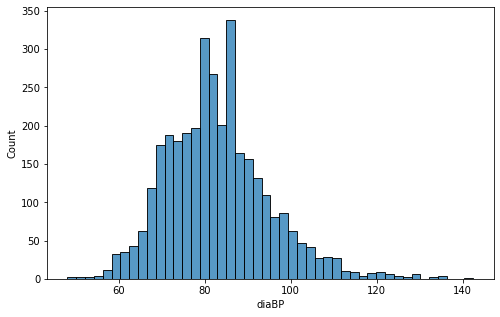

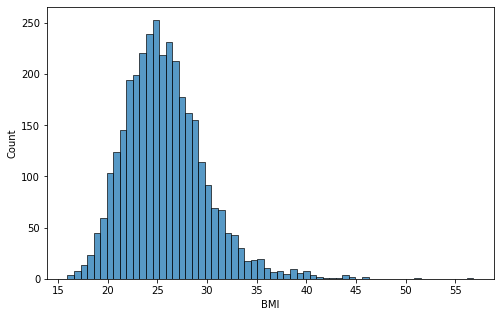

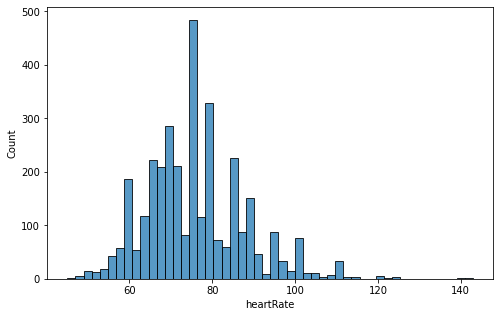

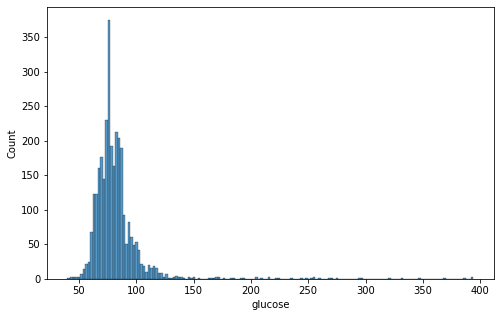

In [17]:
for i in num_cat:
  plt.figure(figsize=(8,5))
  sns.histplot(df[i])

The distribution of the seems normal, but also right skewed, so we can use transformation techniques like log tranformation to deal with skewness

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

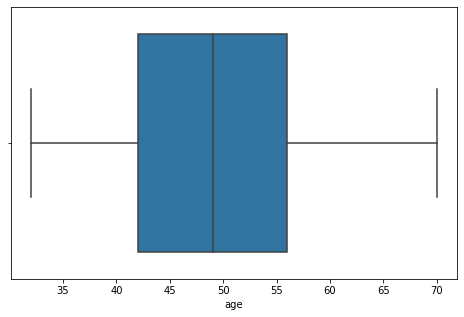

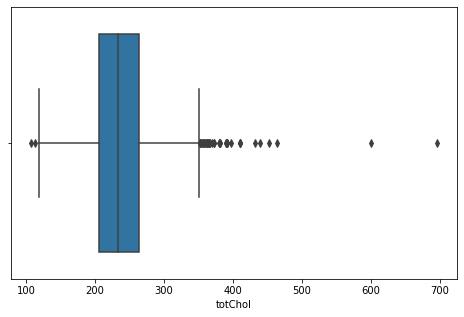

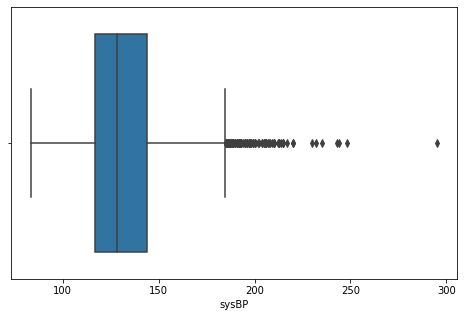

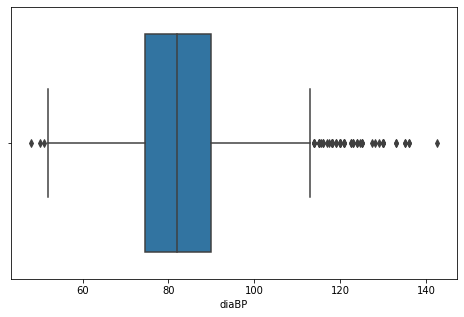

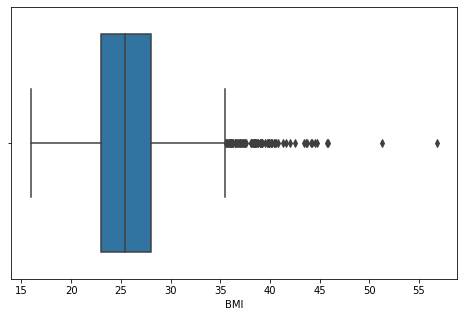

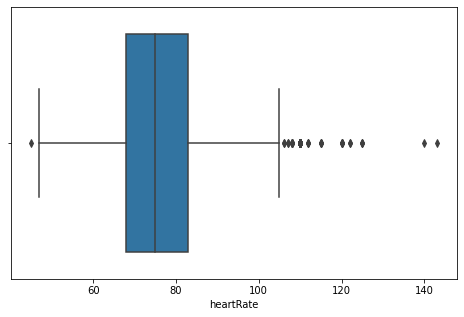

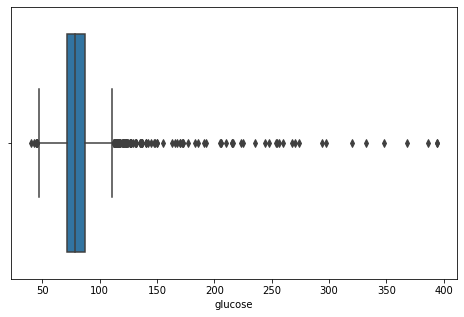

In [18]:
for i in num_cat:
  plt.figure(figsize=(8,5))
  sns.boxplot(df[i])
  

From our standard approach , we classify the any point as outliers if :

- its characteristic is very different from the other points in same field 
- its occurence is rare.

and generally we say that the points which are outiside the whiskers  of boxplot are classified as outliers , but here we see in most plots , the range of the data is as such classifying out of the whisker points as outliers does not seems to be a viable options.

So we will keep the values as of now , and later we can try training the model without these points

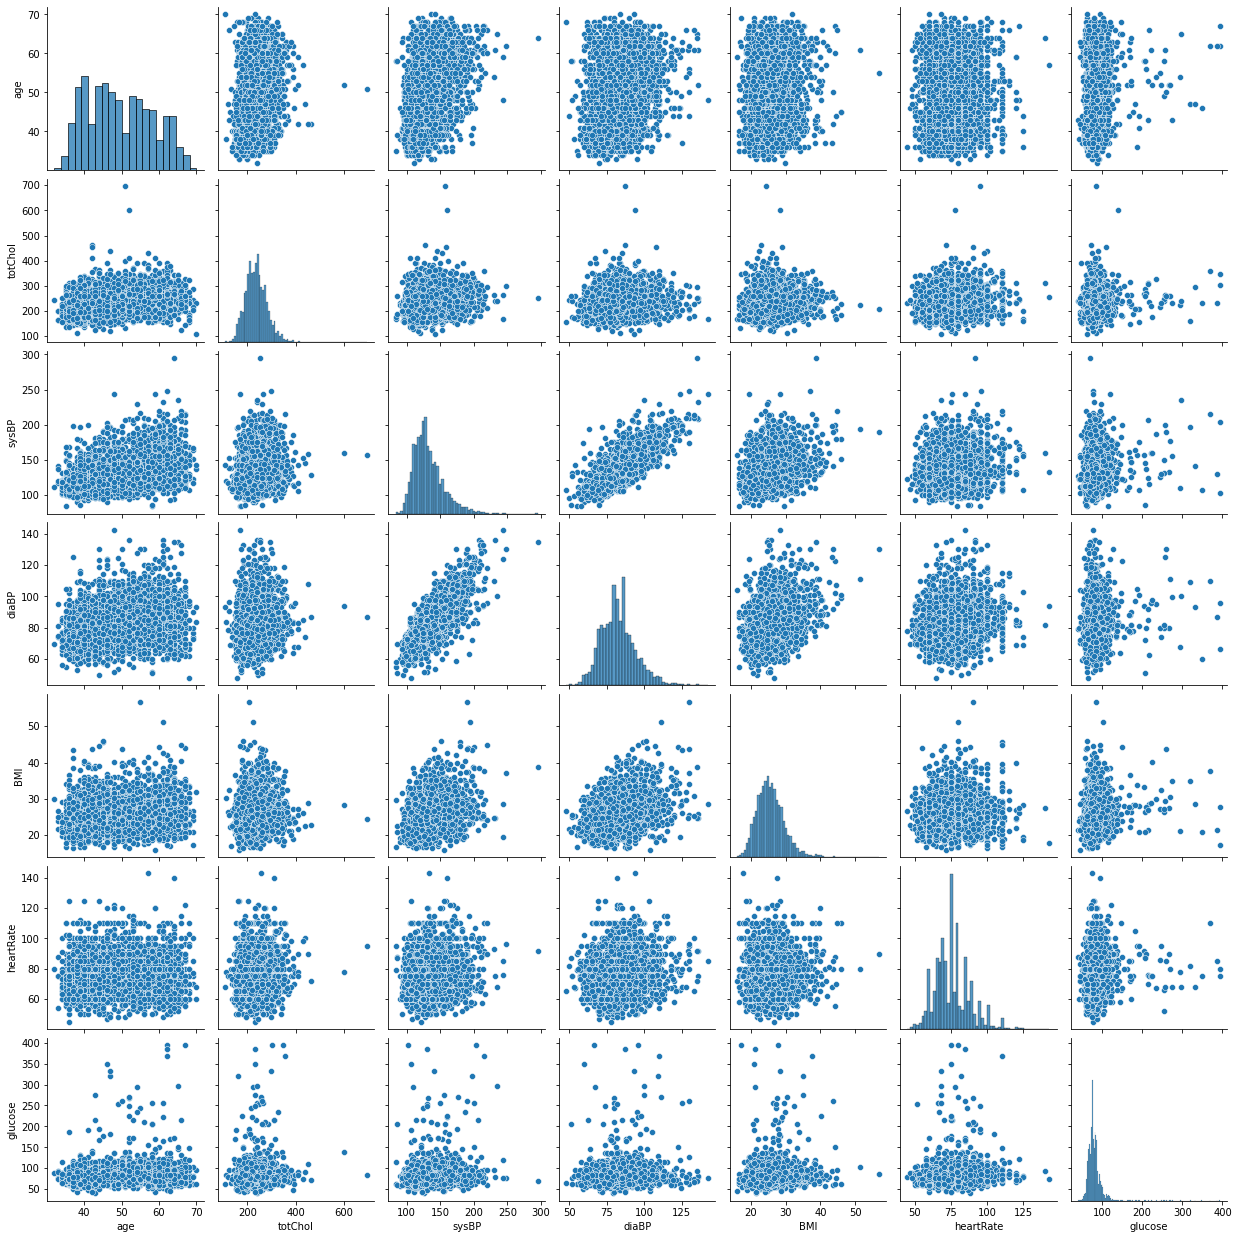

In [19]:
sns.pairplot(df[num_cat])

- in some field like sysbp and dia bp we see a linear relationship
- not much pattern can be seen in the other numerical field.



### Looking at ciggarate per day 

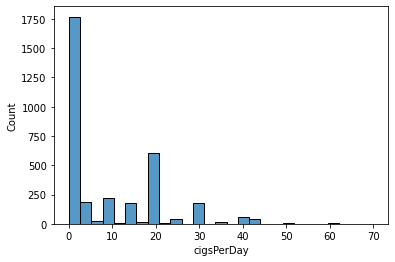

In [20]:
sns.histplot(df.cigsPerDay)

In [21]:
df[df.cigsPerDay>=40]['TenYearCHD'].value_counts()

0    90
1    31
Name: TenYearCHD, dtype: int64

So we see that , the all over ratio in target variable is 1:6 but for cigg per day greater than equal to 40 it is around 1:3 that is double to get a attack

In [22]:
df[df.cigsPerDay==0]['TenYearCHD'].value_counts()

0    1467
1     236
Name: TenYearCHD, dtype: int64

So we can make customized catergory out of this cigs per day

In [23]:
# outliers (can be rejected or not) -- try with outliers and without outliers .
# handling missing values  (individual columns has missing values) try without 
# skewness  --  do some log tranformation
# domain knowledge  - 
# class imbalance- 
# scaling /bining 
#
#

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


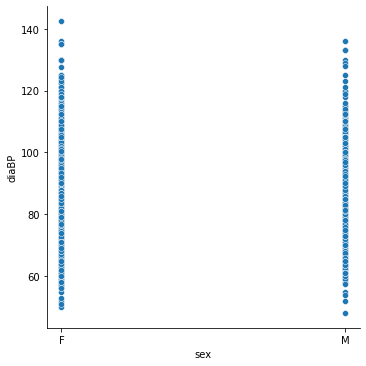

In [24]:
sns.relplot(df['sex'],df['diaBP'])

In [25]:
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


###Age

In [26]:
df['age'].describe()

count    3390.000000
mean       49.542183
std         8.592878
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64

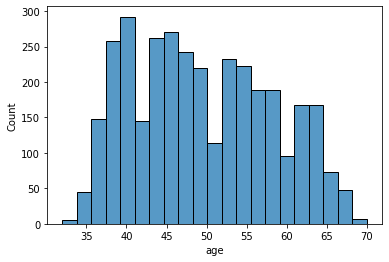

In [27]:
sns.histplot(df['age'])

##feature engineering

For now lets take it as a continous variable and the target variable is randomly distributed among diff ages

'education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose'

All these columns has null values , as we are not facing much outliers effect , and distribution is normal we can impute the missing values with null values.

###Education

In [28]:
df[df['education'].isnull()].shape

(87, 17)

In [29]:
df['education'].fillna(1,inplace=True)

###"cigsPerDay"

In [30]:
df[df['cigsPerDay'].isnull()].shape

(22, 17)

In [31]:
df['cigsPerDay'].fillna(10,inplace=True)

###'BPMeds'

In [32]:
df[df['BPMeds'].isnull()].shape

(44, 17)

In [33]:
df['BPMeds'].fillna(0,inplace=True)

'totChol

In [34]:
df[df['totChol'].isnull()].shape

(38, 17)

In [35]:
df['totChol'].fillna(234,inplace=True)

###'BMI' , Heartrate , glucose

In [36]:
df['BMI'].fillna(25,inplace=True)
df['heartRate'].fillna(75,inplace=True)
df['glucose'].fillna(82,inplace=True)

In [37]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.00,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [38]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.00,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


###Creating Bins for Cigsperday

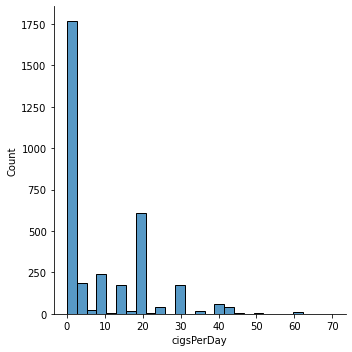

In [39]:
sns.displot(df.cigsPerDay)

In [40]:
df[df.cigsPerDay==0]['TenYearCHD'].value_counts()

0    1467
1     236
Name: TenYearCHD, dtype: int64

In [41]:
df[(df.cigsPerDay<=20)&(df.cigsPerDay>0)]['TenYearCHD'].value_counts()

0    1125
1     198
Name: TenYearCHD, dtype: int64

In [42]:
df[(df.cigsPerDay>20)]['TenYearCHD'].value_counts()

0    287
1     77
Name: TenYearCHD, dtype: int64

so from here we can see there can be three categories in cigs per day , as the ratio of target varible get changed 

In [43]:
def cig_cat(x):
  if x==0:
    return "zero"
  elif x>0 and x<=20:
    return "low cigs"
  elif x>20:
    return "high risk"
df['cigs_cat']=df.cigsPerDay.apply(cig_cat)
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,cigs_cat
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.00,90.0,80.0,1,low cigs
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,zero
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,low cigs
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,low cigs
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,high risk


###Doing Log tranformation on skewed data

In [44]:
for i in  ['glucose','heartRate','BMI','totChol','sysBP']:
  df[i]=np.log(df[i])

In [45]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,cigs_cat
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,5.398163,4.997212,85.0,3.218876,4.499810,4.382027,1,low cigs
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,5.356586,5.123964,98.0,3.393501,4.276666,4.317488,0,zero
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,5.521461,4.753590,71.0,3.013081,4.477337,4.543295,0,low cigs
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,5.451038,5.062595,88.0,3.341447,4.219508,4.543295,1,low cigs
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,5.484797,4.916325,85.0,3.274121,4.248495,4.343805,0,high risk


##One Hot encoding on categorical features

In [46]:
df=pd.get_dummies(df, columns=['sex','is_smoking','cigs_cat'],drop_first=True)

In [47]:
X=df.drop(['id','TenYearCHD','education','cigsPerDay'],axis=1)
y=df['TenYearCHD']

In [48]:
df.head()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_M,is_smoking_YES,cigs_cat_low cigs,cigs_cat_zero
0,0,64,2.0,3.0,0.0,0,0,0,5.398163,4.997212,85.0,3.218876,4.499810,4.382027,1,0,1,1,0
1,1,36,4.0,0.0,0.0,0,1,0,5.356586,5.123964,98.0,3.393501,4.276666,4.317488,0,1,0,0,1
2,2,46,1.0,10.0,0.0,0,0,0,5.521461,4.753590,71.0,3.013081,4.477337,4.543295,0,0,1,1,0
3,3,50,1.0,20.0,0.0,0,1,0,5.451038,5.062595,88.0,3.341447,4.219508,4.543295,1,1,1,1,0
4,4,64,1.0,30.0,0.0,0,0,0,5.484797,4.916325,85.0,3.274121,4.248495,4.343805,0,0,1,0,0


In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   int64  
 1   BPMeds             3390 non-null   float64
 2   prevalentStroke    3390 non-null   int64  
 3   prevalentHyp       3390 non-null   int64  
 4   diabetes           3390 non-null   int64  
 5   totChol            3390 non-null   float64
 6   sysBP              3390 non-null   float64
 7   diaBP              3390 non-null   float64
 8   BMI                3390 non-null   float64
 9   heartRate          3390 non-null   float64
 10  glucose            3390 non-null   float64
 11  sex_M              3390 non-null   uint8  
 12  is_smoking_YES     3390 non-null   uint8  
 13  cigs_cat_low cigs  3390 non-null   uint8  
 14  cigs_cat_zero      3390 non-null   uint8  
dtypes: float64(7), int64(4), uint8(4)
memory usage: 304.7 KB


In [50]:
X.head()

,age,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_M,is_smoking_YES,cigs_cat_low cigs,cigs_cat_zero
0,64,0.0,0,0,0,5.398163,4.997212,85.0,3.218876,4.499810,4.382027,0,1,1,0
1,36,0.0,0,1,0,5.356586,5.123964,98.0,3.393501,4.276666,4.317488,1,0,0,1
2,46,0.0,0,0,0,5.521461,4.753590,71.0,3.013081,4.477337,4.543295,0,1,1,0
3,50,0.0,0,1,0,5.451038,5.062595,88.0,3.341447,4.219508,4.543295,1,1,1,0
4,64,0.0,0,0,0,5.484797,4.916325,85.0,3.274121,4.248495,4.343805,0,1,0,0


Now to data is free from null values!

In [51]:
print(X.shape)
print(y.shape)

(3390, 15)
(3390,)


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [54]:
print(X_train.shape)
print(X_test.shape)

(2373, 15)
(1017, 15)


In [55]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

##Using Logistic Regression (Without CV or hyperparameter tuning)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
model_1=LogisticRegression()
model_1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### We will target Recall here , as False Negative is more important

In [58]:
y_train_pred=model_1.predict(X_train)
print(classification_report(y_train,y_train_pred))


              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2015
           1       0.73      0.10      0.18       358

    accuracy                           0.86      2373
   macro avg       0.79      0.55      0.55      2373
weighted avg       0.84      0.86      0.81      2373



now using class weights as our model is imbalanced

In [59]:
class_weight = {0: 1,
                1: 6}
model_2=LogisticRegression(class_weight=class_weight)
model_2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight={0: 1, 1: 6}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
y_train_pred=model_2.predict(X_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.65      0.76      2015
           1       0.26      0.71      0.38       358

    accuracy                           0.66      2373
   macro avg       0.59      0.68      0.57      2373
weighted avg       0.83      0.66      0.70      2373



  Using class weight , we can handle the imbalance data set problem
  

####Predicting on test with logistic regresion

In [61]:
pred=model_2.predict(X_test)
print(classification_report(y_test,pred))
from sklearn.metrics import recall_score
recall_score(y_test,pred)

              precision    recall  f1-score   support

           0       0.91      0.67      0.77       864
           1       0.25      0.63      0.36       153

    accuracy                           0.66      1017
   macro avg       0.58      0.65      0.57      1017
weighted avg       0.81      0.66      0.71      1017



0.6274509803921569

We see that even dealing with class imbalance , we are not getting significant result with Recall score

##SVM

In [62]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV 

model_svm_1 = svm.SVC(class_weight=class_weight)


In [63]:
model_svm_1.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight={0: 1, 1: 6},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [64]:
y_train_pred_svm_1=model_svm_1.predict(X_train)
print(classification_report(y_train,y_train_pred_svm_1))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83      2015
           1       0.35      0.78      0.48       358

    accuracy                           0.75      2373
   macro avg       0.65      0.76      0.66      2373
weighted avg       0.86      0.75      0.78      2373



Significant improvement in Recall , as we use SVM with class wieghts

In [65]:
y_pred_svm_1=model_svm_1.predict(X_test)
print(classification_report(y_test,y_pred_svm_1))
print(recall_score(y_test,y_pred_svm_1))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       864
           1       0.26      0.55      0.35       153

    accuracy                           0.69      1017
   macro avg       0.58      0.63      0.57      1017
weighted avg       0.80      0.69      0.73      1017

0.5490196078431373


but still we se a less score on the test set

##SVM with Cross validation 

In [66]:
param_dict = {'C': [0.1, 1,10],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf','poly']} 

In [67]:
param_dict = {'C': [0.1,10,1],  
              'kernel': ['rbf','poly','linear']} 
grid = GridSearchCV(model_svm_1, param_dict,n_jobs=2,cv=3, verbose = 10,scoring='recall') 

In [68]:
##grid.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    1.8s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    3.2s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  27 out of  27 | elapsed:    6.3s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  27 out of  27 | elapsed:    6.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight={0: 1, 1: 6}, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid={'C': [0.1, 10, 1],
                         'kernel': ['rbf', 'poly', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=10)

In [69]:
grid.best_params_

{'C': 0.1, 'kernel': 'rbf'}

In [70]:
y_train_pred_svm_cv=grid.predict(X_train)
print(classification_report(y_train,y_train_pred_svm_cv))

              precision    recall  f1-score   support

           0       0.94      0.62      0.75      2015
           1       0.27      0.77      0.40       358

    accuracy                           0.64      2373
   macro avg       0.60      0.70      0.57      2373
weighted avg       0.84      0.64      0.69      2373



In [71]:
y_pred_svm_cv=grid.predict(X_test)
print(classification_report(y_test,y_pred_svm_cv))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72       864
           1       0.22      0.63      0.33       153

    accuracy                           0.61      1017
   macro avg       0.56      0.62      0.53      1017
weighted avg       0.80      0.61      0.66      1017



In [72]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred_svm_cv)

0.6339869281045751

##Trying XGB without using Cross validation

In [81]:
from xgboost import XGBClassifier
xgb_classifier=XGBClassifier(scale_pos_weight=10)

In [82]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, seed=None,
              silent=None, subsample=1, verbosity=1)

In [83]:
y_train_pred_xgb=xgb_classifier.predict(X_train)
print(classification_report(y_train,y_train_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.53      0.68      2015
           1       0.26      0.94      0.41       358

    accuracy                           0.59      2373
   macro avg       0.62      0.73      0.55      2373
weighted avg       0.87      0.59      0.64      2373



In [84]:
y_pred_xgb=xgb_classifier.predict(X_test)
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.91      0.50      0.65       864
           1       0.21      0.73      0.32       153

    accuracy                           0.53      1017
   macro avg       0.56      0.62      0.48      1017
weighted avg       0.81      0.53      0.60      1017

